# Merging Section Questions

### Performing the basics for the questions

In [1]:
#Importing the libraries 
import pandas as pd
import numpy
import os

In [2]:
# Assigning the path variable
path = r'C:\Users\Arjun\Documents\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Arjun\\Documents\\Instacart Basket Analysis'

In [4]:
#First, Lets import the products dataframe
df_prods = pd.read_csv(os.path.join(path,'Data','Prepared Data','products_checked.csv'),index_col = False)

In [5]:
#Verifying the import
df_prods.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,2,All-Seasons Salt,104,13,9.3
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,5,Green Chile Anytime Sauce,5,13,4.3


## Question 3 - Importing data frame from pickled file

In [6]:
#importing the data frame from the pickled file
orders_products_combined = pd.read_pickle(os.path.join(path,'Data', 'Prepared Data','orders_products_combined.pkl'))

In [7]:
#Validating the data frame
orders_products_combined.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge
0,2539329,1,1,2,8,NaN,196,1,0,both
1,2539329,1,1,2,8,NaN,14084,2,0,both
2,2539329,1,1,2,8,NaN,12427,3,0,both
3,2539329,1,1,2,8,NaN,26088,4,0,both
4,2539329,1,1,2,8,NaN,26405,5,0,both


## Question 4 - Checking the shape of the imported dataframe

In [8]:
#Shape function
orders_products_combined.shape

(32434489, 10)

**These dimensions are similar to the exported dataframe.**

## Question 5 - Merging the data frames

**Getting ready for the merging**

In [9]:
#Products dataset
df_prods.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,2,All-Seasons Salt,104,13,9.3
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,5,Green Chile Anytime Sauce,5,13,4.3


In [10]:
#Checking the dimensions of the products
df_prods.shape

(49672, 6)

In [11]:
# We need to remove the Unnamed column
df_prods = df_prods.drop(columns = ['Unnamed: 0'])

In [12]:
df_prods.head()

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3


**Now, we are performing the merging step**

In [13]:
df_merge = orders_products_combined.merge(df_prods,on='product_id',indicator = True)

ValueError: Cannot use name of an existing column for indicator column

**This error is due to not removing the _merge column in the orders_product_combined dataframe**

In [14]:
# Removing the _merge column
df_orders_products_combined = orders_products_combined.drop(columns = ['_merge'])

In [15]:
#Validating the check
df_orders_products_combined.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,NaN,196,1,0
1,2539329,1,1,2,8,NaN,14084,2,0
2,2539329,1,1,2,8,NaN,12427,3,0
3,2539329,1,1,2,8,NaN,26088,4,0
4,2539329,1,1,2,8,NaN,26405,5,0


## Question 6 - Re-performing the merge step

In [16]:
df_merge = df_orders_products_combined.merge(df_prods,on='product_id',indicator = True)

In [17]:
#Validating the merged dataframe
df_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both


In [18]:
#Checking the value counts of the _merge column
df_merge['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

This is expected as it is a full match

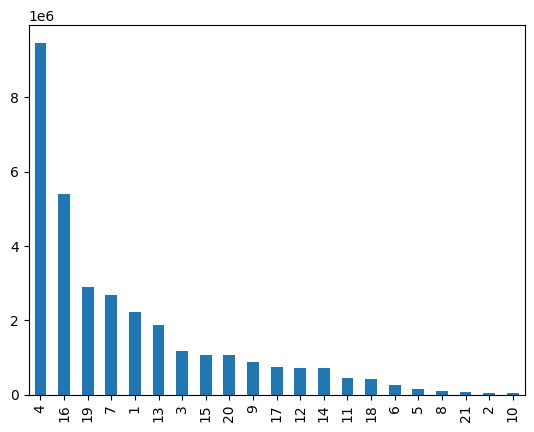

In [23]:
department_products = df_merge['department_id'].value_counts().plot.bar()

In [24]:
#Saving the Visualization
department_products.figure.savefig(os.path.join(path,'Analysis','Visualizations','Department_Products.png'))

## Question 7 - Export data frame

**We will be using the pickle format since the data set is huge and can be exported faster**

In [ ]:
df_merge.to_pickle(os.path.join(path,'Data','Prepared Data','orders_products_merged.pkl'))